In [43]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## EDA

In [6]:
import os
os.getcwd()

'/Users/prachetade/Documents/Data_Science_Materials/Pedram_Slides/Machine_Learning-USU-main/data'

In [7]:
df = pd.read_csv('wage.csv')

In [8]:
df.head()

,wage,hours,IQ,educ,exper,tenure,age,married,black,meduc,feduc
0,76900.0,40,93,12,11,2,31,1,0,8.0,8.0
1,80800.0,50,119,18,11,16,37,1,0,14.0,14.0
2,82500.0,40,108,14,11,9,33,1,0,14.0,14.0
3,65000.0,40,96,12,13,7,32,1,0,12.0,12.0
4,56200.0,40,74,11,14,5,34,1,0,6.0,11.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wage     935 non-null    float64
 1   hours    935 non-null    int64  
 2   IQ       935 non-null    int64  
 3   educ     935 non-null    int64  
 4   exper    935 non-null    int64  
 5   tenure   935 non-null    int64  
 6   age      935 non-null    int64  
 7   married  935 non-null    int64  
 8   black    935 non-null    int64  
 9   meduc    857 non-null    float64
 10  feduc    741 non-null    float64
dtypes: float64(3), int64(8)
memory usage: 80.5 KB


In [10]:
for col in df.columns:
    print(col, ":",df[col].nunique())

wage : 449
hours : 37
IQ : 80
educ : 10
exper : 22
tenure : 23
age : 11
married : 2
black : 2
meduc : 19
feduc : 18


In [23]:
for col in ['black','married','educ']:
    print(col)
    print(df[col].value_counts())
    print("\n")

black
0    815
1    120
Name: black, dtype: int64


married
1    835
0    100
Name: married, dtype: int64


educ
12    393
16    150
13     85
14     77
18     57
15     45
11     43
17     40
10     35
9      10
Name: educ, dtype: int64




In [24]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc', 'feduc'],
      dtype='object')

In [25]:
categorical = ['black','married']
numerics = ['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'meduc', 'feduc']

In [26]:
for col in categorical:
    df[col] = df[col].astype('category')

In [27]:
for col in numerics:
    df[col] = pd.to_numeric(df[col],errors = 'coerce')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   wage     935 non-null    float64 
 1   hours    935 non-null    int64   
 2   IQ       935 non-null    int64   
 3   educ     935 non-null    int64   
 4   exper    935 non-null    int64   
 5   tenure   935 non-null    int64   
 6   age      935 non-null    int64   
 7   married  935 non-null    category
 8   black    935 non-null    category
 9   meduc    857 non-null    float64 
 10  feduc    741 non-null    float64 
dtypes: category(2), float64(3), int64(6)
memory usage: 67.9 KB


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,935.0,95794.545455,40436.082247,11500.0,66900.0,90500.0,116000.0,307800.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
meduc,857.0,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0
feduc,741.0,10.217274,3.300700,0.0,8.0,10.0,12.0,18.0


In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
wage,935.0,NaN,NaN,NaN,95794.545455,40436.082247,11500.0,66900.0,90500.0,116000.0,307800.0
hours,935.0,NaN,NaN,NaN,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,NaN,NaN,NaN,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,NaN,NaN,NaN,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,NaN,NaN,NaN,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,NaN,NaN,NaN,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,NaN,NaN,NaN,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
married,935.0,2.0,1.0,835.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black,935.0,2.0,0.0,815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
meduc,857.0,NaN,NaN,NaN,10.682614,2.849756,0.0,8.0,12.0,12.0,18.0


In [33]:
df.isnull().sum()/len(df)

wage       0.000000
hours      0.000000
IQ         0.000000
educ       0.000000
exper      0.000000
tenure     0.000000
age        0.000000
married    0.000000
black      0.000000
meduc      0.083422
feduc      0.207487
dtype: float64

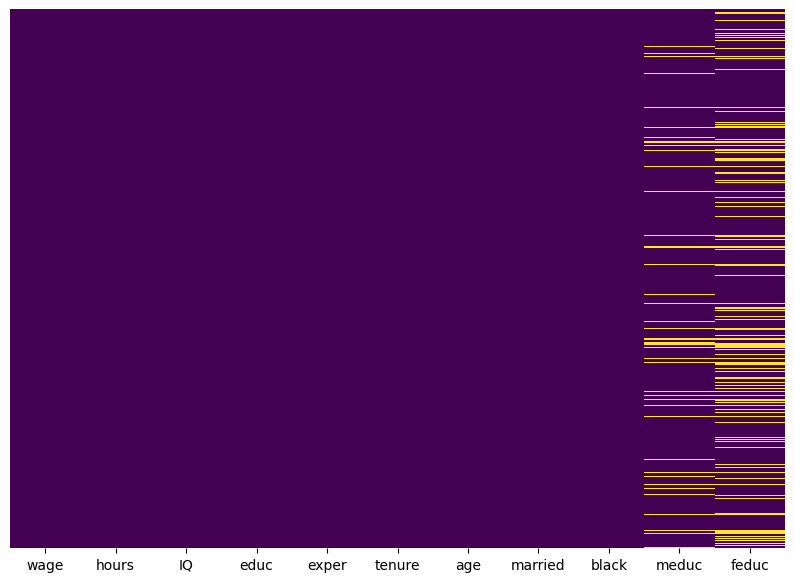

In [36]:
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [37]:
df.drop('feduc',axis=1,inplace=True)

In [38]:
df.columns

Index(['wage', 'hours', 'IQ', 'educ', 'exper', 'tenure', 'age', 'married',
       'black', 'meduc'],
      dtype='object')

In [39]:
df['meduc'].fillna(df['meduc'].median(),axis=0,inplace=True)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
wage,935.0,95794.545455,40436.082247,11500.0,66900.0,90500.0,116000.0,307800.0
hours,935.0,43.929412,7.224256,20.0,40.0,40.0,48.0,80.0
IQ,935.0,101.282353,15.052636,50.0,92.0,102.0,112.0,145.0
educ,935.0,13.468449,2.196654,9.0,12.0,12.0,16.0,18.0
exper,935.0,11.563636,4.374586,1.0,8.0,11.0,15.0,23.0
tenure,935.0,7.234225,5.075206,0.0,3.0,7.0,11.0,22.0
age,935.0,33.080214,3.107803,28.0,30.0,33.0,36.0,38.0
meduc,935.0,10.792513,2.752407,0.0,9.0,12.0,12.0,18.0


In [41]:
df.isnull().sum()

wage       0
hours      0
IQ         0
educ       0
exper      0
tenure     0
age        0
married    0
black      0
meduc      0
dtype: int64

## Data Visualization

/Users/prachetade/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prachetade/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


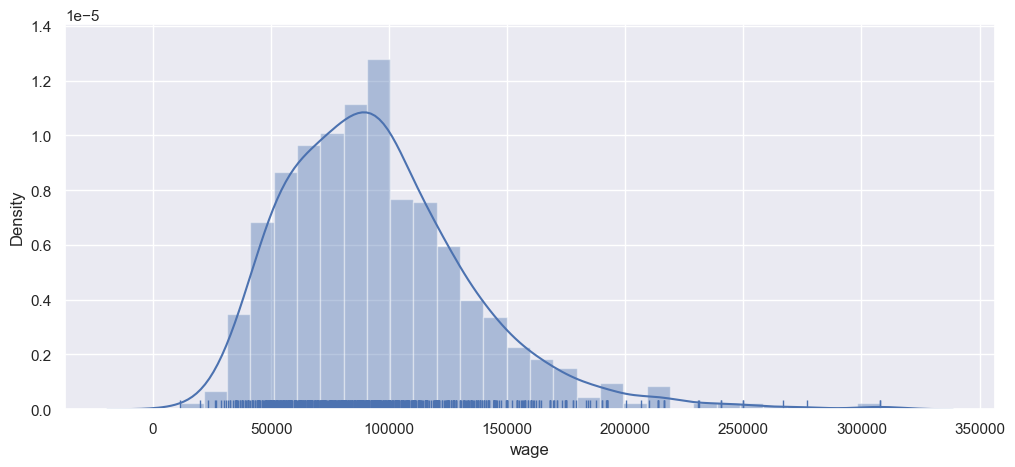

In [44]:
plt.figure(figsize=(12,5))
sns.distplot(df['wage'],bins=30,rug=True)
plt.show()

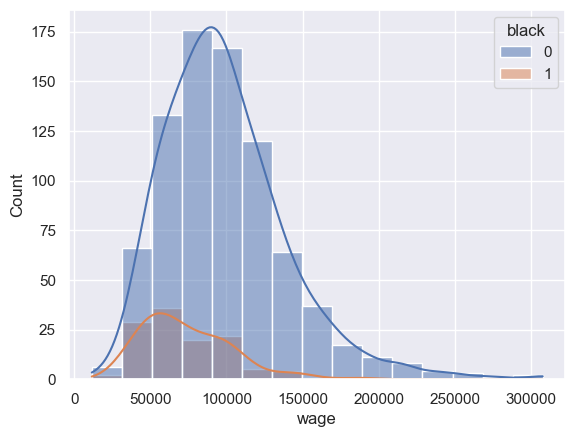

In [67]:

sns.histplot(df,x='wage',hue='black',bins=15,kde=True)
plt.show()

/Users/prachetade/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prachetade/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


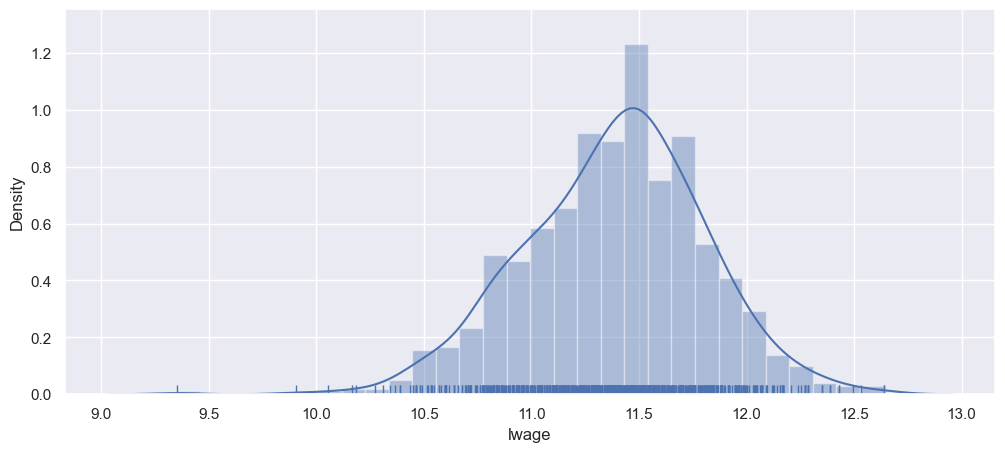

In [69]:
df['lwage'] = np.log(df['wage'])
plt.figure(figsize=(12,5))
sns.distplot(df['lwage'],bins=30,rug=True)
plt.show()

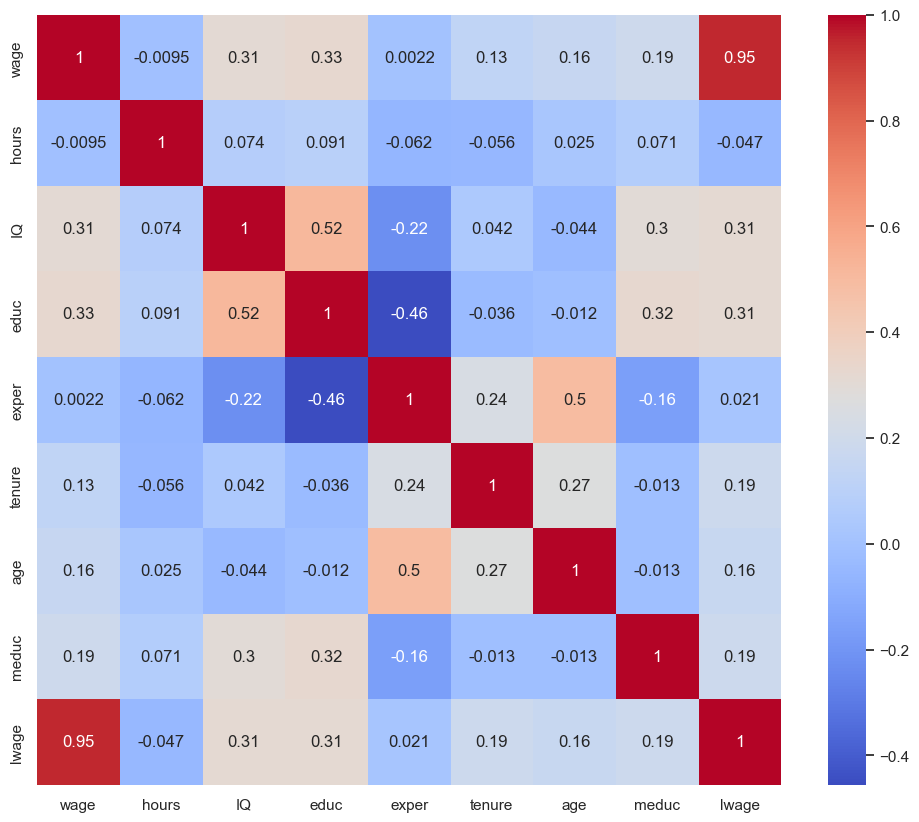

In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()


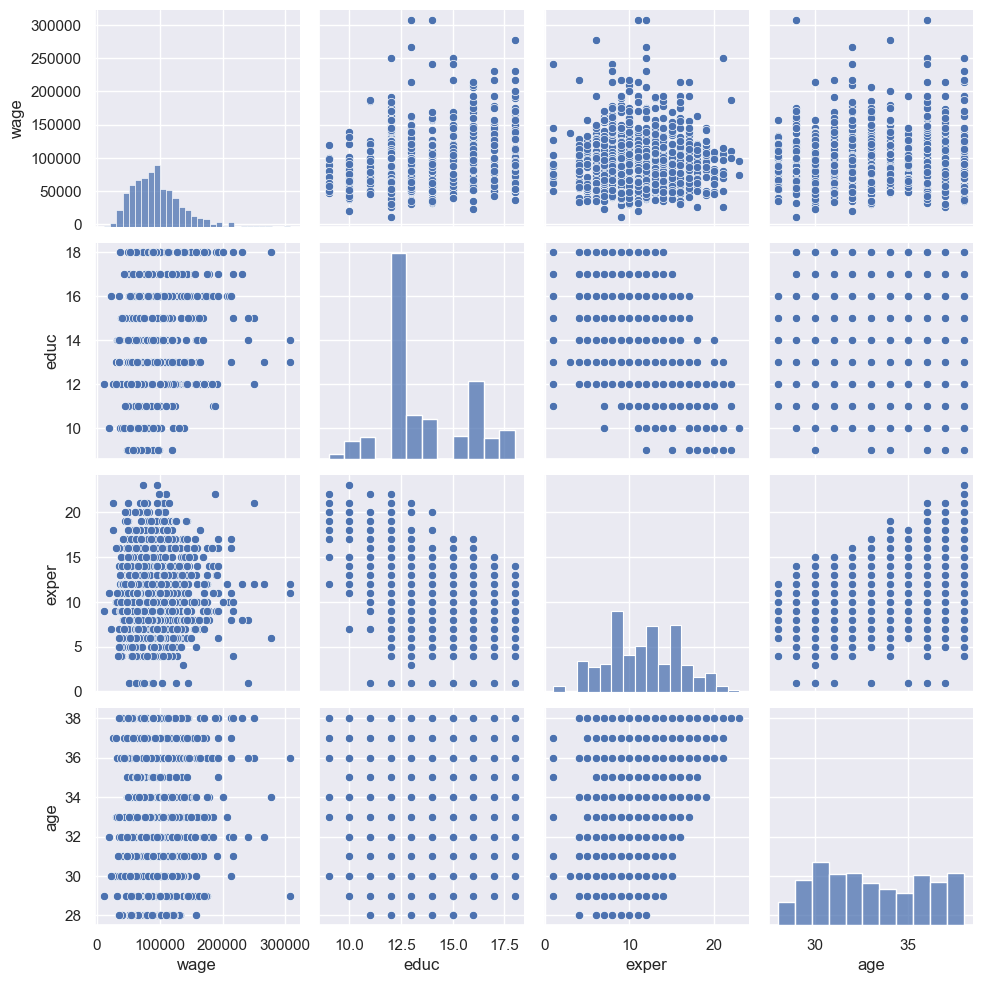

In [78]:
sns.pairplot(df[['wage','educ','exper','age']])
plt.show()

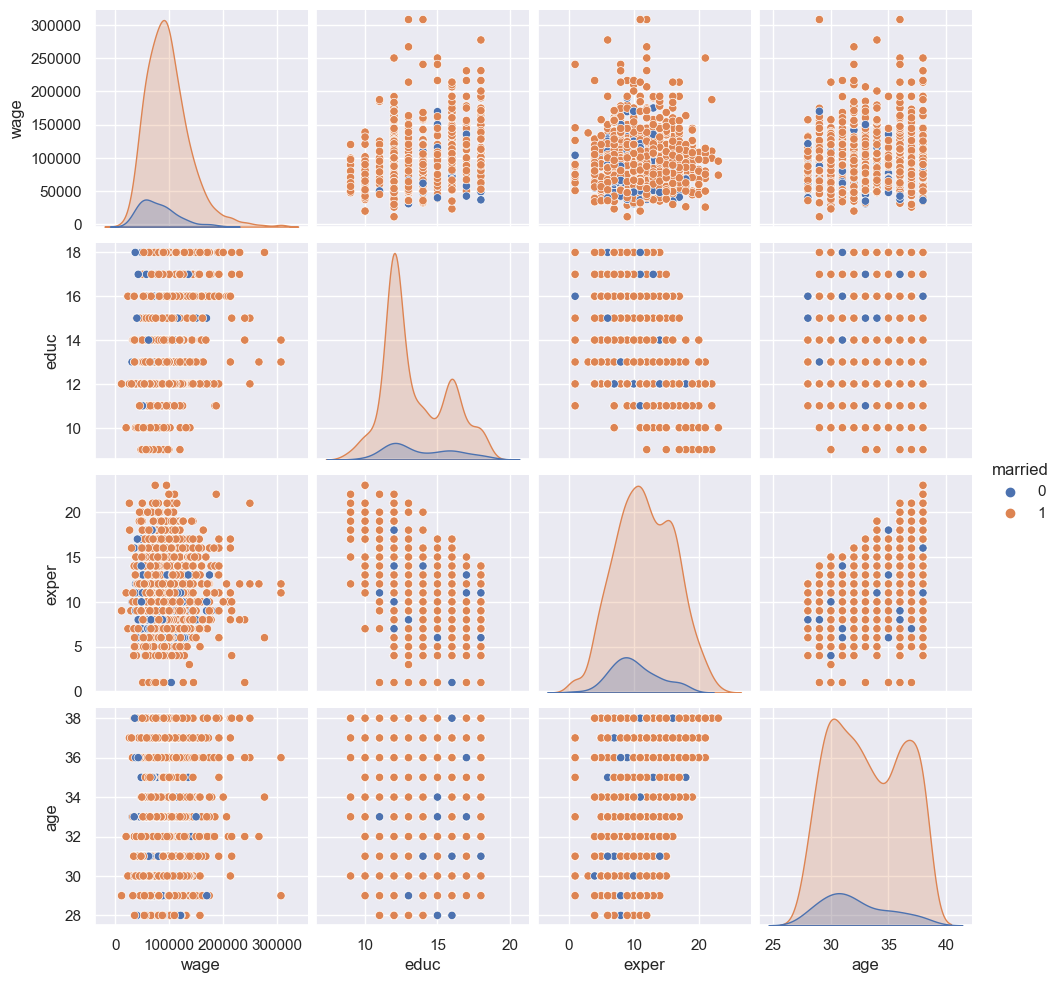

In [82]:
sns.pairplot(df[['wage','educ','exper','age','married']],hue ='married')
plt.show()

In [85]:
df[['wage','educ','exper','age','married','black']].groupby(by=['married','black']).mean()

,wage,educ,exper,age
married,,,,
0,79844.000000,13.840000,10.220000,32.12000
1,97704.790419,13.423952,11.724551,33.19521


In [85]:
df[['wage','educ','exper','age','married','black']].groupby(by=['married','black']).mean()

,wage,educ,exper,age
married,,,,
0,79844.000000,13.840000,10.220000,32.12000
1,97704.790419,13.423952,11.724551,33.19521


In [92]:
df_group_married = df[['wage','educ','exper','age','married']].groupby(by=['married']).mean().reset_index()

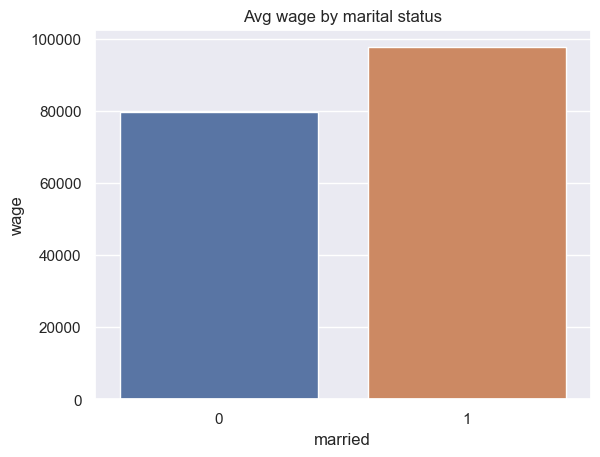

In [93]:
sns.barplot(data=df_group_married,y ='wage',x='married')
plt.title('Avg wage by marital status')
plt.show()

In [95]:
df_group_married.head()

,married,wage,educ,exper,age
0,0,79844.000000,13.840000,10.220000,32.12000
1,1,97704.790419,13.423952,11.724551,33.19521


In [97]:
df_group_married = df[['wage','educ','exper','age','black','married']].groupby(by=['black','married']).mean().reset_index()

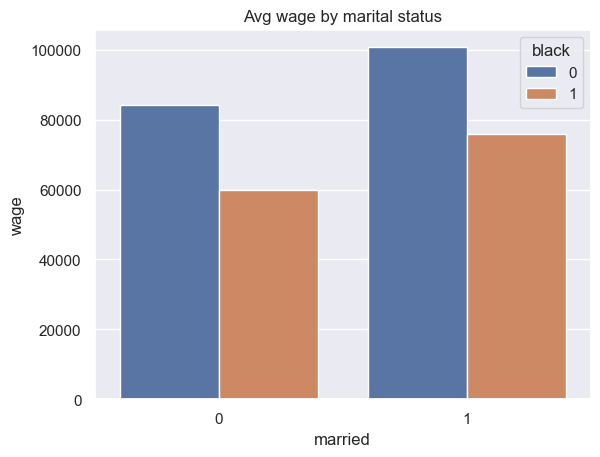

In [98]:
sns.barplot(data=df_group_married,y ='wage',x='married',hue="black")
plt.title('Avg wage by marital status')
plt.show()

In [99]:
df_dummy= pd.get_dummies(df,drop_first=True)
df_dummy.head()

,wage,hours,IQ,educ,exper,tenure,age,meduc,lwage,married_1,black_1
0,76900.0,40,93,12,11,2,31,8.0,11.250261,1,0
1,80800.0,50,119,18,11,16,37,14.0,11.299732,1,0
2,82500.0,40,108,14,11,9,33,14.0,11.320554,1,0
3,65000.0,40,96,12,13,7,32,12.0,11.082143,1,0
4,56200.0,40,74,11,14,5,34,6.0,10.936672,1,0
